In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# use spam.csv dataset from sms-spam-collection-dataset.zip
spam_df = pd.read_csv("C:\\Users\\SHUBHA\\Desktop\\Session-1-Introduction-To-Data-Analytics-Assignment\\14A\\spam.csv", encoding='ISO-8859-1')
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# select the required coolumns
spam_df = spam_df[['v1', 'v2']]
spam_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)


In [7]:
spam_df.shape

(5572, 2)

In [9]:
# 1. Create a word cloud to analyse the ham data
from wordcloud import WordCloud
spam_list = spam_df[spam_df["target"] == "ham"]["text"].unique().tolist()
spam_list[:2]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...']

In [10]:
ham = " ".join(spam_list)
ham[:100]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a'

In [11]:
# create a word cloud for spam
ham_wordcloud = WordCloud().generate(ham)

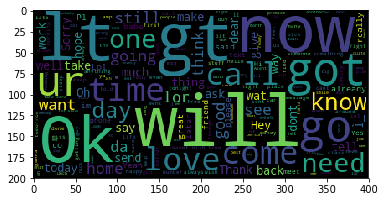

In [12]:
# show the created image of word cloud
plt.figure()
plt.imshow(ham_wordcloud)
plt.show()

In [13]:
# 2. create a custom bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x=cv.fit_transform(spam_df.text).toarray()
x


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
cv.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [15]:
# 3. remove stop words from the bag of words
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()

spam_df['text'] = spam_df['text'].str.lower().str.replace('[^a-z]', ' ').str.split()
#spam_df['text'] = spam_df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))

spam_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHUBHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,text
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."


In [16]:
# 3. using numpy create count vectors for the text data using bag of words
# import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# create an instance
count_vect = CountVectorizer()
# fit the vectorizer with data
count_vect.fit(spam_df.text)

AttributeError: 'list' object has no attribute 'lower'

In [28]:
# convert text to vectors
X = count_vect.transform(spam_df.text).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
X.shape

(5572, 6221)

In [32]:
# encode the target strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(spam_df.target)
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
y.shape

(5572,)

In [34]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [ ]:
# 4. fit the naive bayes model with above vectors and compare the accuracy with existing model

In [38]:
# import Nauve bayes classifier
from sklearn.naive_bayes import MultinomialNB
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


X_train shape: (4179, 6221)
X_test shape: (1393, 6221)


In [39]:
# fit the classifier model
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
# predict the outcome for testing data
predictions = clf.predict(X_test)
predictions.shape

(1393,)

In [41]:
# check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9791816223977028

In [42]:
#Comparing actual and predicted labels
# select 20 records
test_data = spam_df.head(10).text.tolist() + spam_df.tail(10).text.tolist()
actual_label = spam_df.head(10).target.tolist() + spam_df.tail(10).target.tolist()

len(test_data)

20

In [43]:
test_preds = clf.predict(count_vect.transform(test_data))
test_preds.shape

(20,)

In [44]:
# print actual vs predicted
i = 0
for sms, label in zip(test_data, actual_label):
    print(str(test_data[i][:50]) +" ("+ str(actual_label[i]) +") => "+ str(test_preds[i]) )
    i += 1

go jurong point crazi avail bugi n great world la  (ham) => 0
ok lar joke wif u oni (ham) => 0
free entri wkli comp win fa cup final tkt st may t (spam) => 1
u dun say earli hor u c alreadi say (ham) => 0
nah think goe usf live around though (ham) => 0
freemsg hey darl week word back like fun still tb  (spam) => 1
even brother like speak treat like aid patent (ham) => 0
per request mell mell oru minnaminungint nurungu v (ham) => 0
winner valu network custom select receivea prize r (spam) => 1
mobil month u r entitl updat latest colour mobil c (spam) => 1
ok lor soni ericsson salesman ask shuhui say quit  (ham) => 0
ard like dat lor (ham) => 0
wait til least wednesday see get (ham) => 0
huh lei (ham) => 0
remind get pound free call credit detail great off (spam) => 1
nd time tri contact u u pound prize claim easi cal (spam) => 1
b go esplanad fr home (ham) => 0
piti mood suggest (ham) => 0
guy bitch act like interest buy someth els next we (ham) => 0
rofl true name (ham) => 0
